In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
pd.read_csv('diabetes.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df = pd.read_csv('diabetes.csv')
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
162,0,114,80,34,285,44.2,0.167,27,0
319,6,194,78,0,0,23.5,0.129,59,1
399,3,193,70,31,0,34.9,0.241,25,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
X = df.drop(columns=['Outcome'])
y = df.Outcome

In [8]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [14]:
def get_clf_eval(y_test, pred, pred_proba_1):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred_proba_1)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율{recall:.4f}, F1:{f1:.4f}, AUC:{auc:.4f}')
    
def precision_recall_curve_plot(y_test,pred_proba_1):
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_1)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='precision')
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlabel('임계값')
    plt.ylabel('정밀도와 재현율')
    plt.legend()
    plt.grid()
    plt.show()

In [13]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[87 13]
 [22 32]]
정확도:0.7727, 정밀도:0.7111, 재현율0.5926, F1:0.6465, AUC:0.8083


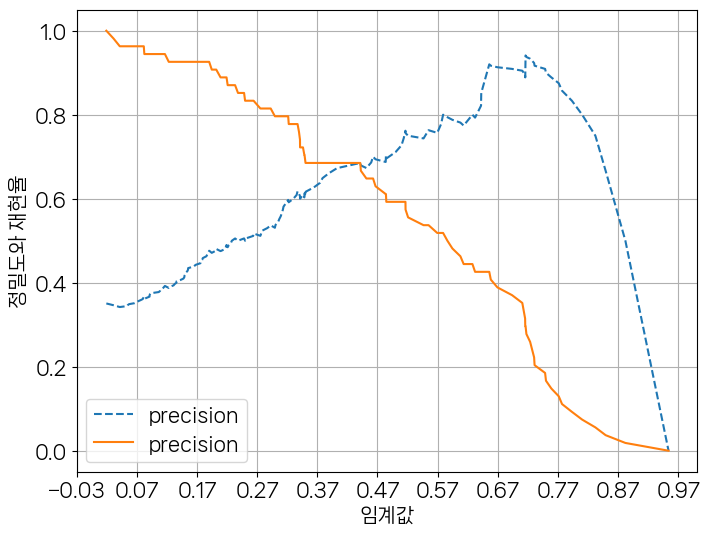

In [16]:
precision_recall_curve_plot(y_test, pred_proba)

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  3.,  0.,  1.,  1.,  1.,  1.,  3.,  4.,  4.,  6.,  4.,
         7., 12.,  9., 17., 10., 15., 20., 16., 20., 17., 20., 26., 22.,
        19., 25., 25., 20., 18., 21., 18., 17., 17., 21., 25., 14., 25.,
        12., 10., 10., 16., 13., 10., 11., 12., 16.,  5.,  9.,  6., 11.,
         5., 10.,  4.,  9.,  7.,  6.,  5.,  5.,  7.,  4.,  3.,  6., 10.,
         4.,  3.,  5.,  6.,  2.,  2.,  5.,  7.,  2.]),
 array([  0.  ,   1.99,   3.98,   5.97,   7.96,   9.95,  11.94,  13.93,
         15.92,  17.91,  19.9 ,  21.89,  23.88,  25.87,  27.86,  29.85,
         31.84,  33.83,  35.82,  37.81,  39.8 ,  41.79,  43.78,  45.77,
         47.76,  49.75,  51.74,  53.73,  55.72,  57.71,  59.7 ,  61.69,
         63.68,  65.67,  67.66,  69.65,  71.64,  73.63,  75.62,  77.61,
         79.6 ,  81.59,  83.58,  85.57,  87.56,  89.55,  91.54,  93.53,
  

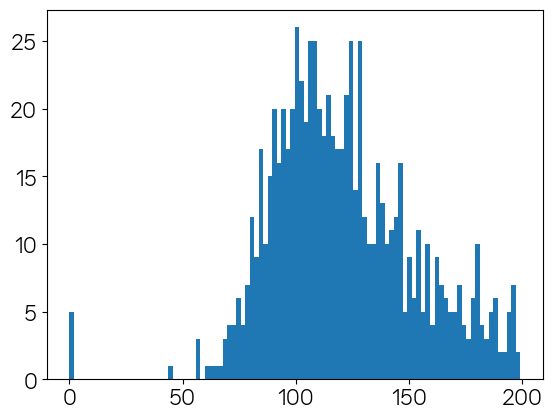

In [19]:
plt.hist(df.Glucose, bins=100)

In [20]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = df['Glucose'].count()
for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
    print(f'{feature}컬럼의 0의 건수는 {zero_count}건, 퍼센트 {100*zero_count/total_count}%')

Glucose컬럼의 0의 건수는 5건, 퍼센트 0.6510416666666666%
BloodPressure컬럼의 0의 건수는 35건, 퍼센트 4.557291666666667%
SkinThickness컬럼의 0의 건수는 227건, 퍼센트 29.557291666666668%
Insulin컬럼의 0의 건수는 374건, 퍼센트 48.697916666666664%
BMI컬럼의 0의 건수는 11건, 퍼센트 1.4322916666666667%


In [22]:
df[zero_features].mean()

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [23]:
mean_zero_features = df[zero_features].mean()

In [24]:
df[zero_features].replace(0, mean_zero_features)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.000000,79.799479,33.6
1,85.0,66.0,29.000000,79.799479,26.6
2,183.0,64.0,20.536458,79.799479,23.3
3,89.0,66.0,23.000000,94.000000,28.1
4,137.0,40.0,35.000000,168.000000,43.1
...,...,...,...,...,...
763,101.0,76.0,48.000000,180.000000,32.9
764,122.0,70.0,27.000000,79.799479,36.8
765,121.0,72.0,23.000000,112.000000,26.2
766,126.0,60.0,20.536458,79.799479,30.1


In [25]:
df[zero_features] = df[zero_features].replace(0, mean_zero_features)

In [26]:
for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
    print(f'{feature}컬럼의 0의 건수는 {zero_count}건, 퍼센트 {100*zero_count/total_count}%')

Glucose컬럼의 0의 건수는 0건, 퍼센트 0.0%
BloodPressure컬럼의 0의 건수는 0건, 퍼센트 0.0%
SkinThickness컬럼의 0의 건수는 0건, 퍼센트 0.0%
Insulin컬럼의 0의 건수는 0건, 퍼센트 0.0%
BMI컬럼의 0의 건수는 0건, 퍼센트 0.0%


In [27]:
X = df.drop(columns=['Outcome'])
y = df.Outcome
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred,pred_proba)
# 오차행렬
# [[87 13]
#  [22 32]]
# 정확도:0.7727, 정밀도:0.7111, 재현율0.5926, F1:0.6465, AUC:0.8083

오차행렬
[[88 12]
 [22 32]]
정확도:0.7792, 정밀도:0.7273, 재현율0.5926, F1:0.6531, AUC:0.8437


In [31]:
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.5]
def get_eval_by_threshold(y_test,pred_proba_1,thresholds):
    from sklearn.preprocessing import Binarizer
    for custom_threshold in thresholds:
        custom_predict = Binarizer(threshold=custom_threshold).fit_transform(pred_proba_1)
        print(f'임계값:{custom_threshold}')
        get_clf_eval(y_test,custom_predict,pred_proba_1)
get_eval_by_threshold(y_test,pred_proba.reshape(-1,1),thresholds)

임계값:0.3
오차행렬
[[66 34]
 [ 9 45]]
정확도:0.7208, 정밀도:0.5696, 재현율0.8333, F1:0.6767, AUC:0.8437
임계값:0.33
오차행렬
[[74 26]
 [12 42]]
정확도:0.7532, 정밀도:0.6176, 재현율0.7778, F1:0.6885, AUC:0.8437
임계값:0.36
오차행렬
[[78 22]
 [14 40]]
정확도:0.7662, 정밀도:0.6452, 재현율0.7407, F1:0.6897, AUC:0.8437
임계값:0.39
오차행렬
[[83 17]
 [16 38]]
정확도:0.7857, 정밀도:0.6909, 재현율0.7037, F1:0.6972, AUC:0.8437
임계값:0.42
오차행렬
[[83 17]
 [17 37]]
정확도:0.7792, 정밀도:0.6852, 재현율0.6852, F1:0.6852, AUC:0.8437
임계값:0.45
오차행렬
[[84 16]
 [19 35]]
정확도:0.7727, 정밀도:0.6863, 재현율0.6481, F1:0.6667, AUC:0.8437
임계값:0.48
오차행렬
[[85 15]
 [21 33]]
정확도:0.7662, 정밀도:0.6875, 재현율0.6111, F1:0.6471, AUC:0.8437
임계값:0.5
오차행렬
[[88 12]
 [22 32]]
정확도:0.7792, 정밀도:0.7273, 재현율0.5926, F1:0.6531, AUC:0.8437
